<b><font size="6">Which statistic plays the biggest role in getting the most points scored in the NFL Fantasy season by a Quarterback?</font></b>


![alt text](https://drive.google.com/uc?id=1DqvrWrpiDrw4QhpNBSY5FPjeLBeOLbJa)

<h1><b><font size="5">Introduction</font></b><h1>

Fantasy football is an online game in which the participants serve as general managers of virtual professional NFL teams. The participants choose team rosters by conducting a draft in which all real NFL players are available. Points are based on the actual performances of the players in the real-world match-up. Competition typically lasts an entire season, and the winner is determined based on head-to-head fantasy roster match-ups.

For this project we will focus on the most important piece of a fantasy football roster - the quarterback position (QB). We want to see which statistic helps NFL Quarterbacks gain the most points throughout the season. 
The points in the standard league are assigned by the following criteria:

Passing Yards: 1 point per 25 yards

Passing Touchdowns: 4 points

Passing Interceptions: -2 points

Rushing Yards: 1 point per 10 yards

Rushing Touchdowns: 6 points

Fumbles Lost: -2 points

Example:
If a Quarterback throws for 100 yards in a game, Rushes for 1 touchdown and loses 1 fumble, the total fantasy points earned in that game by that QB are: 100 / 25 + 6 - 2 = 8.0 points

*********************
Further reading:
1.  https://fantasy.nfl.com/research
The above link has a lot more information of Fantasy football as a competitive online game. The tabs of top of the page have different information based on player positions and projected statistics.

2. https://www.theringer.com/nfl-preview/2019/8/15/20806716/fantasy-football-sticky-stats
This article does a deep dive into statistics and data behind some of the specific postion players. The metrics that can be used for future protections and data analysis.

********************************
The reason this is an interesting question to answer is because all QBs have a different style of play. Based on varying styles of play, particular QBs tend to score more points in 1 category and not so much in the others. By analyzing which category is more important to overall fantasy performance will help us make a more informed decision in the next year's draft.

If the points are based on the actual performances of the players in the real-world game, wouldn't you just always pick the Quarterbacks that had the best season/play the best?

Not necessarily. While the real-world performance is tied to fantasy performance, the relationship isn't as strictly defined as it may seem. Often, a bad performance by a QB (judged by real-world standards such as: Interceptions at a critical time, not converting 3rd downs and ultimately bearing the responsibility of losing a game) can lead to a lot of fantasy points. Our project will focus on looking at specifically fantasy performance and metrics associated with that. We want to see which metrics have the strongest relationship with a high fantasy score. Are the quarterbacks who get a lot yards the highest scorers, or are the ones who throw the most touchdowns preferred? Does fumbling or throwing an interception really damage a players standing? We hope to analyze all of these factors in the span of this project.



<h2><b>Outline</b></h2>
<b>1. Getting Started</b>
<UL>
<LI>1.1 Required Libraries</LI>
<LI>1.2 Dataset Source</LI>
<LI>1.3 Data Cleaning</LI>
<LI>1.4 Additional Data</LI>
<LI>1.5 Combining Data</LI>
</UL>
<b>2. Explore Our Data</b>
<UL>
<LI>2.1 Outlier Detection</LI>
<LI>2.2 Linear Regression</LI>
<LI>2.3 Linear Regression by season</LI>
<LI>2.4 Top Fantasy performers</LI>
</UL>
<b>3. Testing</b>
<UL>
<LI>3.1 Correlation</LI>
<LI>3.2 P-values</LI>
<LI>3.2 Linear Regression coefficents</LI>
<LI>3.2 Residual plot</LI>
</UL>
<b>4. Conclusion</b>
<UL>
</UL>

<UL>

<b><font size="5">1.1 Libraries Used:</font></b>
<LI>Requests: for making HTTP requests in python
<LI>Pandas: used for data manipulation and organization
<LI>Beautiful Soup: used for organizing messy html data into neat pandas data frames
<LI>Seaborn: provides a high-level interface for graphics and visualizations
<LI>Matplotlib: this is another visualization tool, seaborn library is built on top of matplotlib
<LI>Statsmodels - module that provides statistical models as well as tools for statistical data exploration
</UL>

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

<b><font size="5">1.2 The **Data**:</font></b>

For this project we pulled 5 years (2015-2019) worth of QB data from NFL.com fantasy database. The data from each year contains top 25 performing QBs (based on total fantasy points) that year. The dataset also contains a lot of extra data such as Receiving Yards, Number of Receptions, Receiving Touchdowns and Fumbles Recovered. However, the QB position rarely earns points in those categories. Thus, we will not be looking at the data in those columns.

In [0]:
r = requests.get('https://fantasy.nfl.com/research/scoringleaders?position=1&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=14')
r18 = requests.get('https://fantasy.nfl.com/research/scoringleaders?position=1&statCategory=stats&statSeason=2018&statType=seasonStats&statWeek=14')
r17 = requests.get('https://fantasy.nfl.com/research/scoringleaders?position=1&sort=pts&statCategory=stats&statSeason=2017&statType=seasonStats')
r16 = requests.get('https://fantasy.nfl.com/research/scoringleaders?position=1&sort=pts&statCategory=stats&statSeason=2016&statType=seasonStats')
r15 = requests.get('https://fantasy.nfl.com/research/scoringleaders?position=1&sort=pts&statCategory=stats&statSeason=2015&statType=seasonStats')

In [0]:
root = BeautifulSoup(r.content,'lxml')
root18 = BeautifulSoup(r18.content,'lxml')
root17 = BeautifulSoup(r17.content,'lxml')
root16 = BeautifulSoup(r16.content,'lxml')
root15 = BeautifulSoup(r15.content,'lxml')

In [0]:
raw_data = root.find("div","tableWrap").find("table")
raw_data18 = root18.find("div","tableWrap").find("table")
raw_data17 = root17.find("div","tableWrap").find("table")
raw_data16 = root16.find("div","tableWrap").find("table")
raw_data15 = root15.find("div","tableWrap").find("table")

In [0]:
data = pd.read_html(raw_data.prettify())[0]
data18 = pd.read_html(raw_data18.prettify())[0]
data17 = pd.read_html(raw_data17.prettify())[0]
data16 = pd.read_html(raw_data16.prettify())[0]
data15 = pd.read_html(raw_data15.prettify())[0]

<b><font size="5">1.3 **Data Cleaning**:</font></b>


We created a year column so that it is easier for us to manipulate the data in our dataset, then we combined our data into 1 table using pd.concat.

In [0]:
data['Year'] = 19
data16['Year'] = 16
data17['Year'] = 17
data18['Year'] = 18
data15['Year'] = 15
data = pd.concat([data,data18])
data = pd.concat([data,data17])
data = pd.concat([data,data16])
data = pd.concat([data,data15])

In [0]:
data = data.reset_index(drop = True)

We simplified the multi-index columns into single-index columns. Then we dropped some of the unnessesary columns (all the columns that kept track of receiving stats are unnessessary for our exploratory data analysis) and cleaned the data a bit.

In [8]:
data.columns

MultiIndex([('Unnamed: 0_level_0',   'Rank'),
            ('Unnamed: 1_level_0', 'Player'),
            ('Unnamed: 2_level_0',    'Opp'),
            (           'Passing',    'Yds'),
            (           'Passing',     'TD'),
            (           'Passing',    'Int'),
            (           'Rushing',    'Yds'),
            (           'Rushing',     'TD'),
            (         'Receiving',    'Rec'),
            (         'Receiving',    'Yds'),
            (         'Receiving',     'TD'),
            (               'Ret',     'TD'),
            (              'Misc',  'FumTD'),
            (              'Misc',    '2PT'),
            (               'Fum',   'Lost'),
            (           'Fantasy', 'Points'),
            (              'Year',       '')],
           )

In [9]:
data = data.drop(columns=['Receiving'])
data = data.drop(columns=['Ret'])
data = data.drop(columns = ['Misc'])
data = data.drop(columns = ['Unnamed: 2_level_0'])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [0]:
data.columns = [' '.join(col).strip() for col in data.columns.values]

In [0]:
data = data.rename(columns={"Unnamed: 0_level_0 Rank": "Rank"})
data = data.rename(columns={"Unnamed: 1_level_0 Player": "Player"})

In [12]:
data.head()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year
0,1,Lamar Jackson QB - BAL View Videos,2889,33,6,1103,7,1,385.86,19
1,2,Deshaun Watson QB - HOU View News View Videos,3425,24,9,344,7,3,295.00,19
2,3,Dak Prescott QB - DAL View Videos,4122,24,11,223,3,1,279.18,19
3,4,Russell Wilson QB - SEA View News View Videos,3422,26,5,312,3,2,278.08,19
4,5,Josh Allen QB - BUF,2737,17,8,439,8,4,251.38,19


Convert_name function helped us get rid of extra information in the name column of our data

In [0]:

def convert_name(dt):
  name_list = []
  for i in range(0,len(dt)):
    full = dt.iloc[i]['Player'].split(' ')
    name_list.append(full[0] + ' '+ full[1])
  return name_list



In [0]:
name_list = convert_name(data)

We added a year next to a players name so that we could differentiate between the years that their performance took place (This will be important for later visualizations)

In [0]:
data['Player'] = name_list
data['Player'] = data['Player'] + ' ' + data['Year'].astype(str)

In [16]:
data.head()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year
0,1,Lamar Jackson 19,2889,33,6,1103,7,1,385.86,19
1,2,Deshaun Watson 19,3425,24,9,344,7,3,295.00,19
2,3,Dak Prescott 19,4122,24,11,223,3,1,279.18,19
3,4,Russell Wilson 19,3422,26,5,312,3,2,278.08,19
4,5,Josh Allen 19,2737,17,8,439,8,4,251.38,19


<b><font size="5">1.4 Additional Data:</font></b>

We are adding another data set that will contain number of wins for top QB players over last 5 years. We are looking to see if there's a potential correlation between game wins and fantasy points earned.

This data comes from a different website, so we are going to use different urls for scraping the data. The agent variable is needed so that we have access to the website. Without it, we get a 403: Forbidden error. The headers tell the site that we are a browser so that we get access.

In [17]:
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}

rwins19 = requests.get('https://www.footballdb.com/stats/qb-seasons.html',headers = agent)
root19 = BeautifulSoup(rwins19.content,'lxml')
raw_wins19 = root19.find('table')

rwins18 = requests.get('https://www.footballdb.com/stats/qb-seasons.html?yr=2018&type=',headers = agent)
root18 = BeautifulSoup(rwins18.content,'lxml')
raw_wins18 = root18.find('table')

rwins17 = requests.get('https://www.footballdb.com/stats/qb-seasons.html',headers = agent)
root17 = BeautifulSoup(rwins17.content,'lxml')
raw_wins17 = root17.find('table')

rwins16 = requests.get('https://www.footballdb.com/stats/qb-seasons.html?yr=2018&type=',headers = agent)
root16 = BeautifulSoup(rwins16.content,'lxml')
raw_wins16 = root16.find('table')

rwins15 = requests.get('https://www.footballdb.com/stats/qb-seasons.html?yr=2018&type=',headers = agent)
root15 = BeautifulSoup(rwins16.content,'lxml')
raw_wins15 = root15.find('table')

wins19 = pd.read_html(raw_wins19.prettify())[0]
wins18 = pd.read_html(raw_wins18.prettify())[0]
wins17 = pd.read_html(raw_wins17.prettify())[0]
wins16 = pd.read_html(raw_wins16.prettify())[0]
wins15 = pd.read_html(raw_wins15.prettify())[0]


wins19['Year'] = 19
wins18['Year'] = 18
wins17['Year'] = 17
wins16['Year'] = 16
wins15['Year'] = 15
wins = pd.concat([wins19,wins18])
wins = pd.concat([wins,wins17])
wins = pd.concat([wins,wins16])
wins = pd.concat([wins,wins15])
wins = wins.reset_index(drop = True)
wins.head()

,Player,Team,GS,W,L,T,Pct,Year
0,Lamar Jackson L. Jackson,Bal,14,12,2,0,0.857,19
1,Jimmy Garoppolo J. Garoppolo,SF,13,11,2,0,0.846,19
2,Tom Brady T. Brady,NE,14,11,3,0,0.786,19
3,Aaron Rodgers A. Rodgers,GB,14,11,3,0,0.786,19
4,Russell Wilson R. Wilson,Sea,14,11,3,0,0.786,19


In [18]:
wins['Player'] = convert_name(wins)
wins['Player'] = wins['Player'] + ' ' + wins['Year'].astype(str)
wins.head()


,Player,Team,GS,W,L,T,Pct,Year
0,Lamar Jackson 19,Bal,14,12,2,0,0.857,19
1,Jimmy Garoppolo 19,SF,13,11,2,0,0.846,19
2,Tom Brady 19,NE,14,11,3,0,0.786,19
3,Aaron Rodgers 19,GB,14,11,3,0,0.786,19
4,Russell Wilson 19,Sea,14,11,3,0,0.786,19


In [0]:
wins = wins.drop(['Year','Team'],axis = 1)

In [20]:
wins.head()

,Player,GS,W,L,T,Pct
0,Lamar Jackson 19,14,12,2,0,0.857
1,Jimmy Garoppolo 19,13,11,2,0,0.846
2,Tom Brady 19,14,11,3,0,0.786
3,Aaron Rodgers 19,14,11,3,0,0.786
4,Russell Wilson 19,14,11,3,0,0.786


We have created a new dataset called wins from the newly scraped data. Next, we want to join the data with our previous dataframe. 

<b><font size="5">1.5 Combining Data:</font></b>

We want to combine our old dataset with our new dataset in such a way that each corresponding player in each corresponding year gets the data that applies to them. This operation could be tedious if we just iterated through the sets, but luckily pandas provides a convenient function called join. This function joins two datasets based on a key. Our key will be player's names (with season year indicated next to them). We performed entity resolution on two data sets to ensure that the player columns for each dataset match, so that each player-year pair receives its corresponding data.

In [21]:
data = data.join(wins.set_index('Player'),on = 'Player')
data.tail()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
120,21,Teddy Bridgewater 15,3231,14,9,192,3,3,200.44,15,1.0,0.0,1.0,0.0,0.000
121,22,Brian Hoyer 15,2606,19,7,44,-,2,166.64,15,NaN,NaN,NaN,NaN,NaN
122,23,Joe Flacco 15,2791,14,12,23,3,2,161.94,15,9.0,4.0,5.0,0.0,0.444
123,24,Andrew Luck 15,1881,15,12,196,-,1,130.84,15,18.0,11.0,7.0,0.0,0.611
124,25,Blaine Gabbert 15,2031,10,7,185,1,1,129.74,15,3.0,2.0,1.0,0.0,0.667


Our datasets are joined. We did a left join where our fantasy dataset was the left suffix and our wins dataset was our right suffix. This means that only the rows in our fantasy dataset are kept, and any excess rows from the real dataset are removed. We used this method because we only care about the players from our fantasy dataset. It is possible for there to be missing data in this new dataset. Specifically if a player from our fantasy data does not exist in the real data, we need to account for all the missing values that would be introduced.

In [22]:
data.count()

Rank              125
Player            125
Passing Yds       125
Passing TD        125
Passing Int       125
Rushing Yds       125
Rushing TD        125
Fum Lost          125
Fantasy Points    125
Year              125
GS                118
W                 118
L                 118
T                 118
Pct               118
dtype: int64

In [23]:
data[data.isnull().any(axis = 1)]

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
53,4,Alex Smith 17,4042,26,5,355,1,1,295.18,17,NaN,NaN,NaN,NaN,NaN
62,13,Blake Bortles 17,3687,21,13,322,2,3,249.68,17,NaN,NaN,NaN,NaN,NaN
65,16,Tyrod Taylor 17,2799,14,4,427,4,2,222.66,17,NaN,NaN,NaN,NaN,NaN
70,21,Josh McCown 17,2926,18,9,124,5,4,205.44,17,NaN,NaN,NaN,NaN,NaN
74,25,DeShone Kizer 17,2894,11,22,419,5,6,175.66,17,NaN,NaN,NaN,NaN,NaN
97,23,Trevor Siemian 16,3401,18,10,57,-,2,191.74,16,NaN,NaN,NaN,NaN,NaN
121,22,Brian Hoyer 15,2606,19,7,44,-,2,166.64,15,NaN,NaN,NaN,NaN,NaN


Seven players from our fantasy dataset did not exist in our real dataset, so the columns that would be from there are filled with NaN. Since there are only 7 missing players, this will probably not have a big impact on our data, so we can drop those rows from our data set

In [0]:
data = data.dropna()
data = data.reset_index(drop = True)

In [0]:
data = data.replace('-',0)

The dashes in the original data set represent no score or 0. We went ahead and replaced all '-' with 0. This will make it easier to manipulate our data

In [26]:
data.tail()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
113,20,Marcus Mariota 15,2818,19,10,252,2,6,211.02,15,13.0,7.0,6.0,0.0,0.538
114,21,Teddy Bridgewater 15,3231,14,9,192,3,3,200.44,15,1.0,0.0,1.0,0.0,0.000
115,23,Joe Flacco 15,2791,14,12,23,3,2,161.94,15,9.0,4.0,5.0,0.0,0.444
116,24,Andrew Luck 15,1881,15,12,196,0,1,130.84,15,18.0,11.0,7.0,0.0,0.611
117,25,Blaine Gabbert 15,2031,10,7,185,1,1,129.74,15,3.0,2.0,1.0,0.0,0.667


Lastly, all of our numeric data were stored as Strings, so we converted them to floats in order to perform statistical analyses.

In [0]:
data[['Passing Yds','Passing TD','Rushing Yds','Rushing TD','Passing Int','Fum Lost','Fantasy Points',]] = data[['Passing Yds','Passing TD','Rushing Yds','Rushing TD','Passing Int','Fum Lost','Fantasy Points',]].astype(float)

<b><font size="6">2. Exploratory Data Analysis:</font></b>

For the EDA we took multiple approaches to learn as much as we could about our data. The next table will show some basic statistics about the dataset. We use summary statistics in the pandas describe() function to show columns with their quantitative data. The 'Count' row will say how complete each column is, and in our case no data is missing. There are 125 players in the dataset in total, so we know that the rows for the specific attributes and overall fantasy points are completely populated.

In [28]:
data.describe()

,Rank,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,12.720339,3682.610169,24.110169,10.601695,199.838983,2.144068,2.974576,252.640847,17.025424,12.974576,6.745763,6.110169,0.118644,0.495085
std,7.168170,720.304577,7.292173,3.953014,184.240598,2.105245,1.883177,56.279376,1.446847,4.054041,3.656598,2.490268,0.324748,0.186950
min,1.000000,1881.000000,10.000000,2.000000,-9.000000,0.000000,0.000000,129.740000,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,7.000000,3225.000000,19.000000,7.000000,61.500000,1.000000,2.000000,211.310000,16.000000,11.000000,4.000000,4.250000,0.000000,0.385000
50%,12.500000,3718.500000,23.000000,11.000000,145.500000,2.000000,3.000000,257.210000,17.000000,13.000000,6.000000,6.000000,0.000000,0.462000
75%,19.000000,4216.250000,29.000000,13.000000,281.750000,3.000000,4.000000,285.155000,18.000000,16.000000,9.000000,7.000000,0.000000,0.611000
max,25.000000,5208.000000,50.000000,23.000000,1103.000000,10.000000,10.000000,417.080000,19.000000,19.000000,15.000000,12.000000,1.000000,0.857000


In [29]:
tot = data.groupby(['Year']).sum()
tot

,Rank,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,GS,W,L,T,Pct
Year,,,,,,,,,,,,,
15,303,89215.0,606.0,265.0,5033.0,51.0,60.0,6231.00,304.0,151.0,149.0,4.0,11.345
16,302,95385.0,599.0,273.0,4498.0,55.0,78.0,6380.20,327.0,165.0,158.0,4.0,11.858
17,246,74826.0,477.0,220.0,3664.0,35.0,57.0,4959.44,201.0,95.0,105.0,1.0,8.151
18,325,96916.0,657.0,264.0,5171.0,52.0,76.0,6753.64,386.0,211.0,172.0,3.0,13.392
19,325,78206.0,506.0,229.0,5215.0,60.0,80.0,5487.34,313.0,174.0,137.0,2.0,13.674


In [30]:
tot.index

Int64Index([15, 16, 17, 18, 19], dtype='int64', name='Year')

<b><font size="5">2.1 Outlier Detection:</font></b>

Next we wanted to look at distribution of particular attributes by year. First bar chart shows total Passing yards (sum of all passing yards by each QB) for each year. Our Expected Total average is (Number of QBs in a year) *(Average across all the years) => 25 * 3648 = 91,200.
Looking at the first bar-chart our data is right around that average.

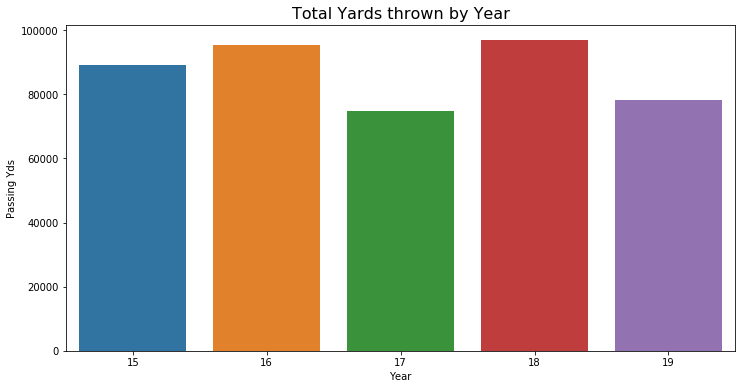

In [31]:
plt.figure(figsize=(12,6))
plt.title("Total Yards thrown by Year", fontsize=16)
sns.barplot(data=tot, x=tot.index, y='Passing Yds')
plt.show()

Next bar chart shows total Touchdowns thrown (sum of all thrown TDs by each QB) for each year. Our Expected Total average is (Number of QBs in a year) x (Average across all the years) => 23.72*25 = 593. Looking at the next bar-chart our data appears close to that average

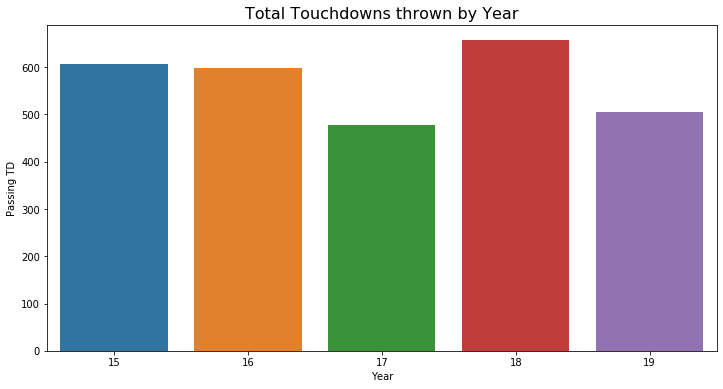

In [32]:
plt.figure(figsize=(12,6))
plt.title("Total Touchdowns thrown by Year", fontsize=16)
sns.barplot(data=tot, x=tot.index, y='Passing TD')
plt.show()

Next bar chart shows total Interceptions thrown (sum of all thrown INTs by each QB) for each year. Our Expected Total average is (Number of QBs in a year)x(Average across all the years) => 10.512*25 = 262.8. Looking at the following bar-chart every year total appears close to that average

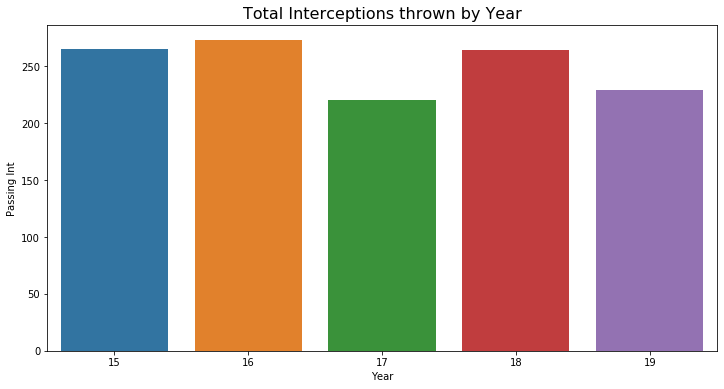

In [33]:
plt.figure(figsize=(12,6))
plt.title("Total Interceptions thrown by Year", fontsize=16)
sns.barplot(data=tot, x=tot.index, y='Passing Int')
plt.show()

Next bar chart shows total Rushing Yards (sum of all rushing yards by each QB) for each year. Our Expected Total average is (Number of QBs in a year)*(Average across all the years) => 202.632x25 = 5065.8. Looking at the following bar-chart most years apear close to that average. Year 2016 is the only year significantly below the average.

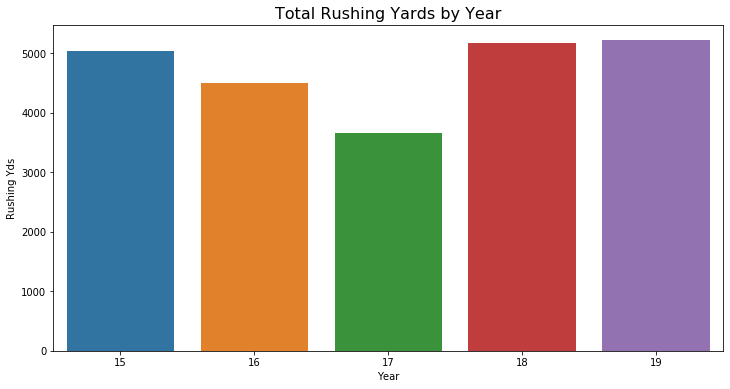

In [34]:
plt.figure(figsize=(12,6))
plt.title("Total Rushing Yards by Year", fontsize=16)
sns.barplot(data=tot, x=tot.index, y='Rushing Yds')
plt.show()

Next bar chart shows total Rushing Touchdowns (sum of all rushing TDs by each QB) for each year. Our Expected Total average is (Number of QBs in a year)*(Average across all the years) => 2.168x25 = 54.2. Looking at the following bar-chart our data appears close to that average. Year 2019 is the only year significantly above the average.

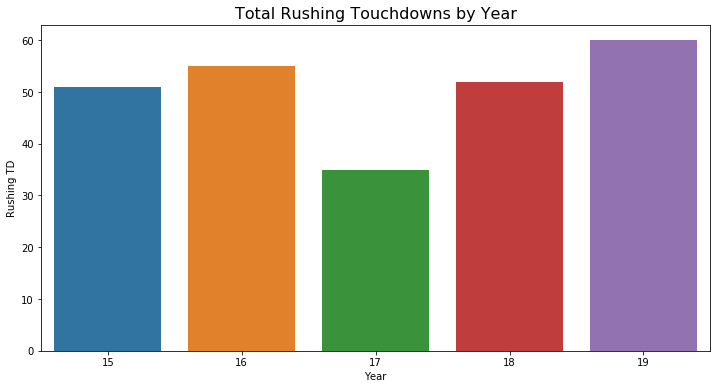

In [35]:
plt.figure(figsize=(12,6))
plt.title("Total Rushing Touchdowns by Year", fontsize=16)
sns.barplot(data=tot, x=tot.index, y='Rushing TD')
plt.show()

<b><font size="5">2.2 Regression Plot Analysis:</font></b>

We created a function that would plot a regression line for each attribute and Fantasy Points. This allows us to 
In the first plot, Passing Yards and Fantasy Points have a decently strong linear relationship. A few outliers include: Cam Newton's 2015 MVP season and Patrick Mahomes's 2018 season and Aaron Rodgers's 2016 season. This relationship appears strong, which makes sense, since getting the ball across the field is one of the primary tasks of a quarterback.

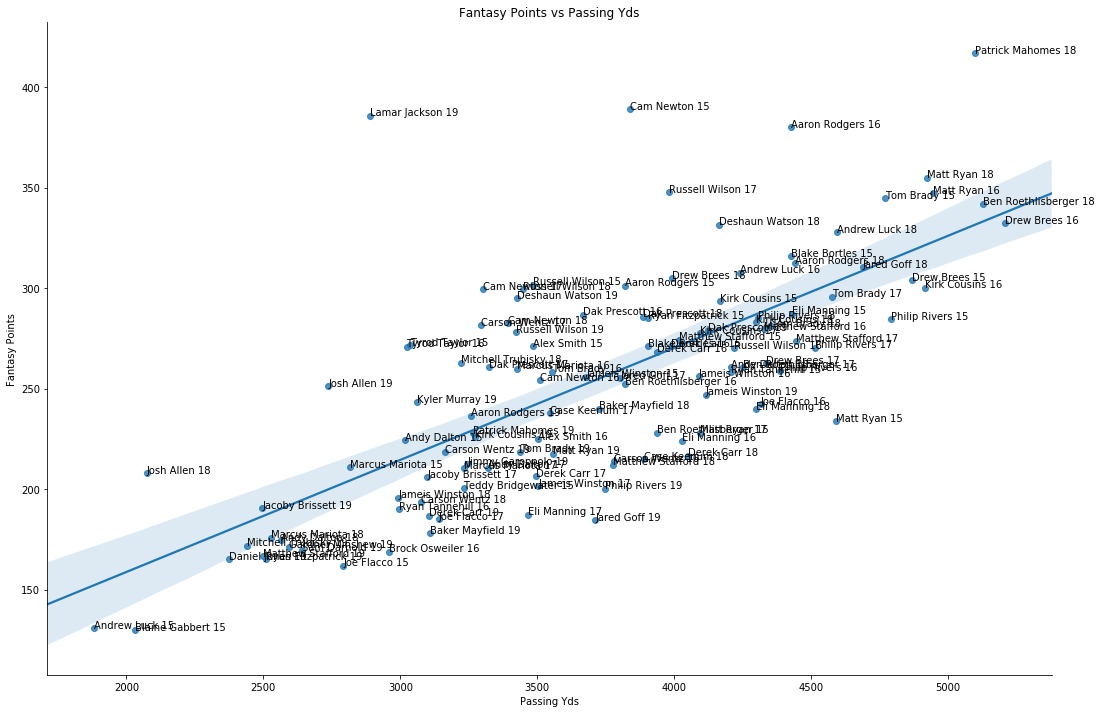

In [36]:
def plot_D(x, y):
  p = sns.regplot(x, y)
  for line in range(0,data.shape[0]):
     p.text(x[line]+0.01, y[line], 
     data['Player'][line], horizontalalignment='left', 
     size='medium', color='black')
  p.figure.set_size_inches(18,12)
  sns.despine()
  plt.title("Fantasy Points vs " + x.name)
plot_D(data['Passing Yds'], data['Fantasy Points'])

In the next plot, Passing Touchdowns and Fantasy Points have a strong and very linear relationship. No extreme outliers appear in this data. Cam Newton's 2015 MVP season is the closest thing we have to an outlier in this plot. Again, the strength of this relationship makes sense because touchdown passes are one of the main ways a quarterback contributes to their team.

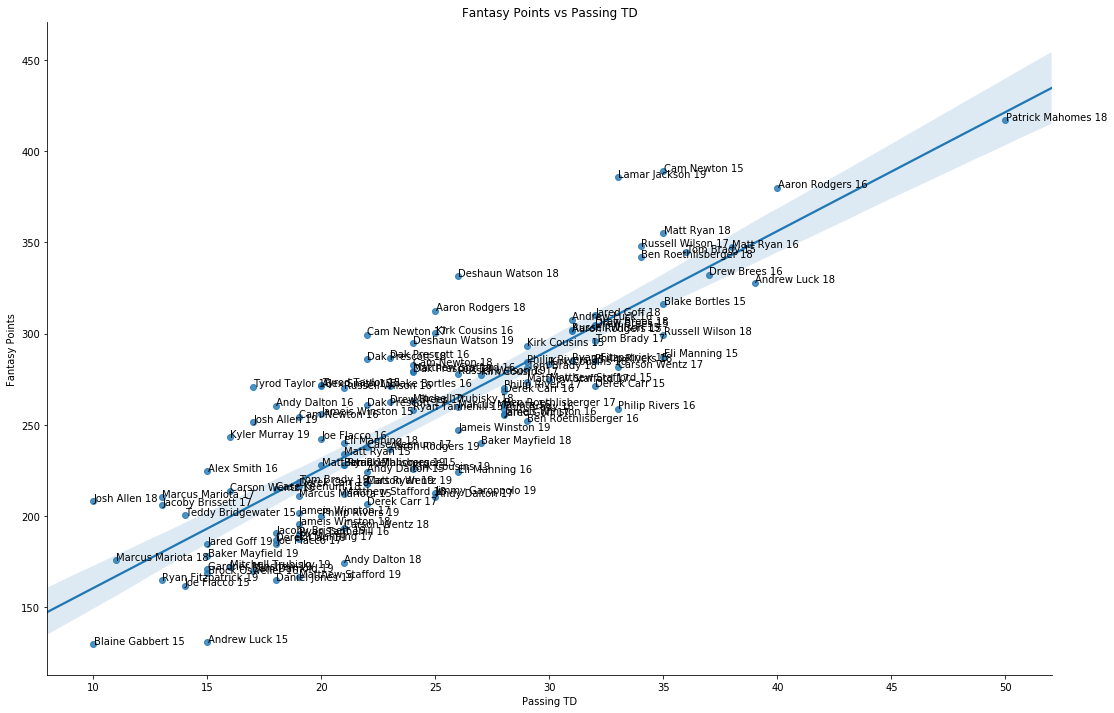

In [37]:
plot_D(data['Passing TD'], data['Fantasy Points'])

In the next plot, Passing Interceptions and Fantasy Points do not have much of an observable linear relationship. Just as before, Patrick Mahomes's 2018 season and Cam Newtown's 2015 season are prime candidates to be outliers here. But even without those data points, we still have a pretty random spread of data with no obvious linear relationship.

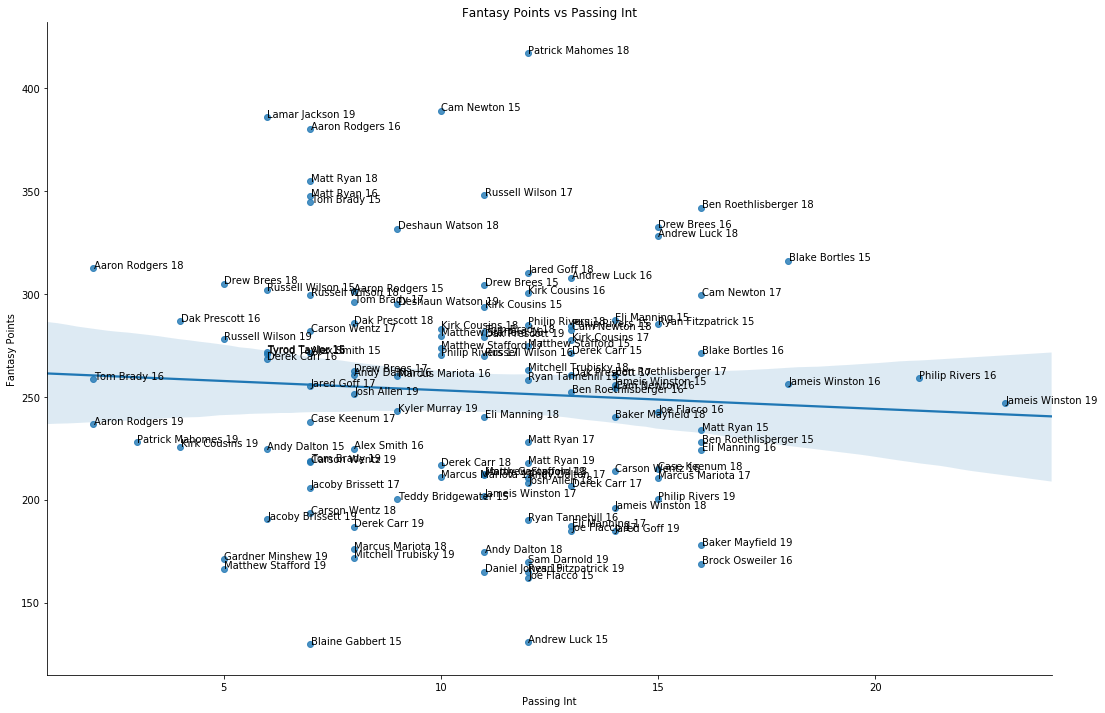

In [38]:

plot_D(data['Passing Int'], data['Fantasy Points'])

In the next plot, Rushing Yards and Fantasy Points have somewhat of a linear relationship. Data appears denser and more spread out towards lower values of Rushing Yards. A few outliers include: Cam Newton's 2015 MVP season and Patrick Mahomes's 2018 season and Aaron Rodgers's 2016 season (again).

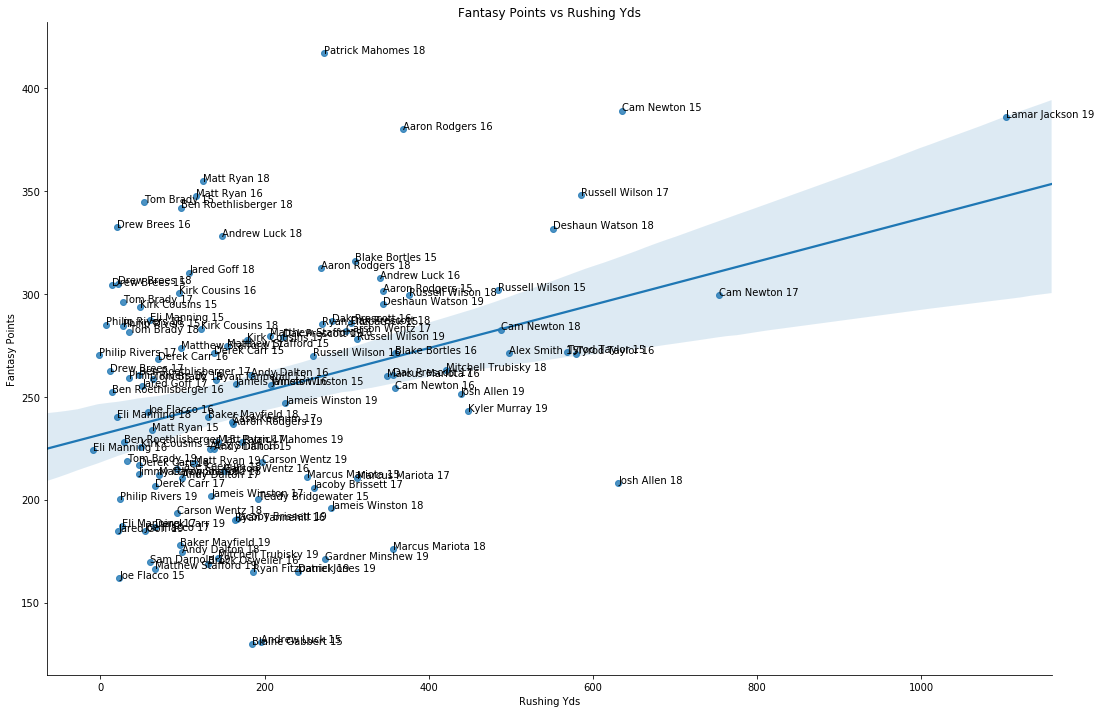

In [39]:

plot_D(data['Rushing Yds'], data['Fantasy Points'])

In the next plot, Rushing Touchdowns and Fantasy Points have even less of a linear relationship then Rushing Yards and Fantasy Points. Data appears denser towards lower values of Rushing Touchdowns. A few outliers include: Cam Newton's 2015 MVP season and Patrick Mahomes's 2018 season and Aaron Rodgers's 2016 season(again)

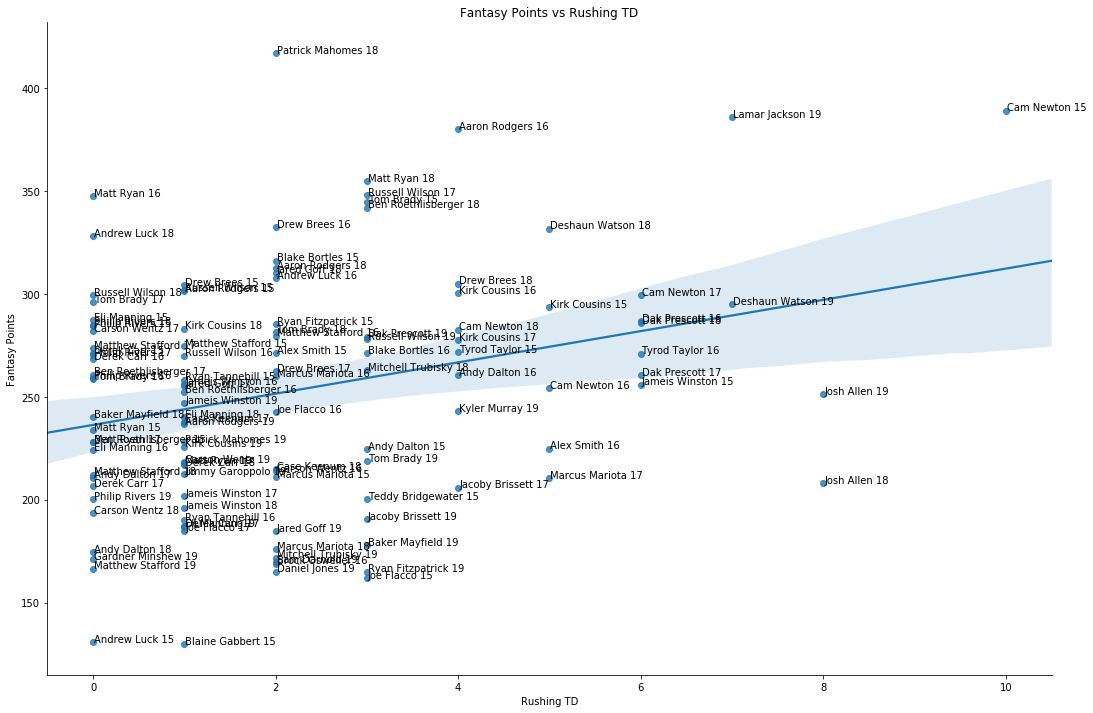

In [40]:

plot_D(data['Rushing TD'], data['Fantasy Points'])

<b><font size="5">2.3 Linear Regression Analysis by season:</font></b>

For the next graph we separated the years(seasons) for the passing yards to see if there's a potential outlier season that could be skewing our data. There's a fairly linear relationship so linear regression is still a reliable method to model our data. As you can see from the plot the slopes are different for each of the seasons, so it might be worth looking at coefficients for individual years.

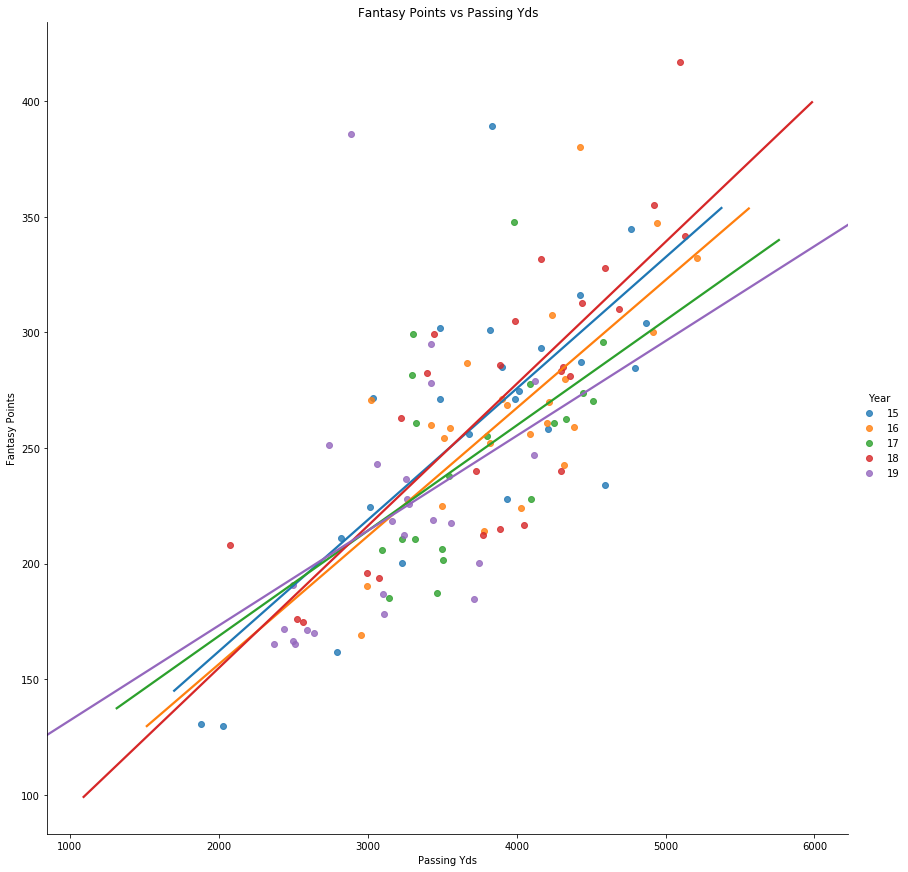

In [41]:
def plot_Years(x, y):
  p = sns.lmplot(x, y,data=data,hue = "Year",ci = None,height = 12)
  sns.despine()
  plt.title("Fantasy Points vs " + x)

plot_Years('Passing Yds', 'Fantasy Points')

Similar to the step above we separated the years for the passing touchdowns to see if there's a potential outlier season that could be skewing our data. There's a fairly linear relationship so linear regression is still a reliable method to model our data. As you can see from the plot the slopes are different for each of the seasons, so it might be worth looking at coefficients for individual years.

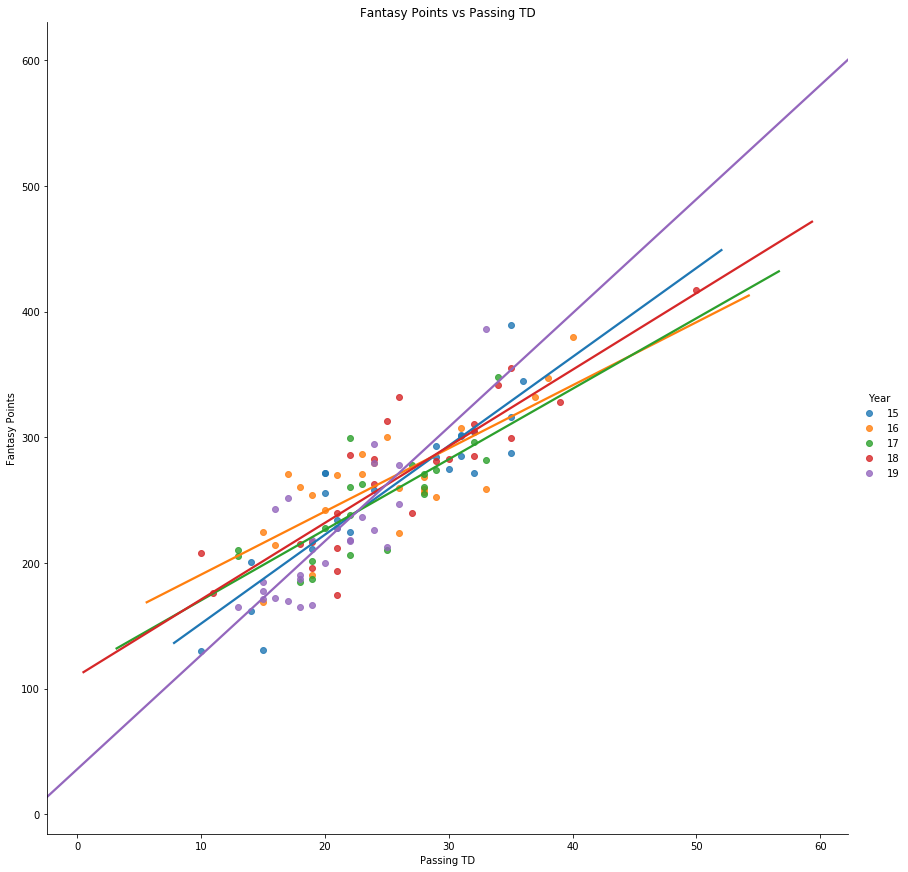

In [42]:
plot_Years('Passing TD', 'Fantasy Points')

For rushing yards vs Fantasy points we get a very different set of lines for each year. This likely to a large disparity in rushing yards between QBs. Slopes are drastically different, with some seasons having little impact on overall fantasy performance. Since the data tends to be more scarce for rushing yards, it is also more prone to outliers

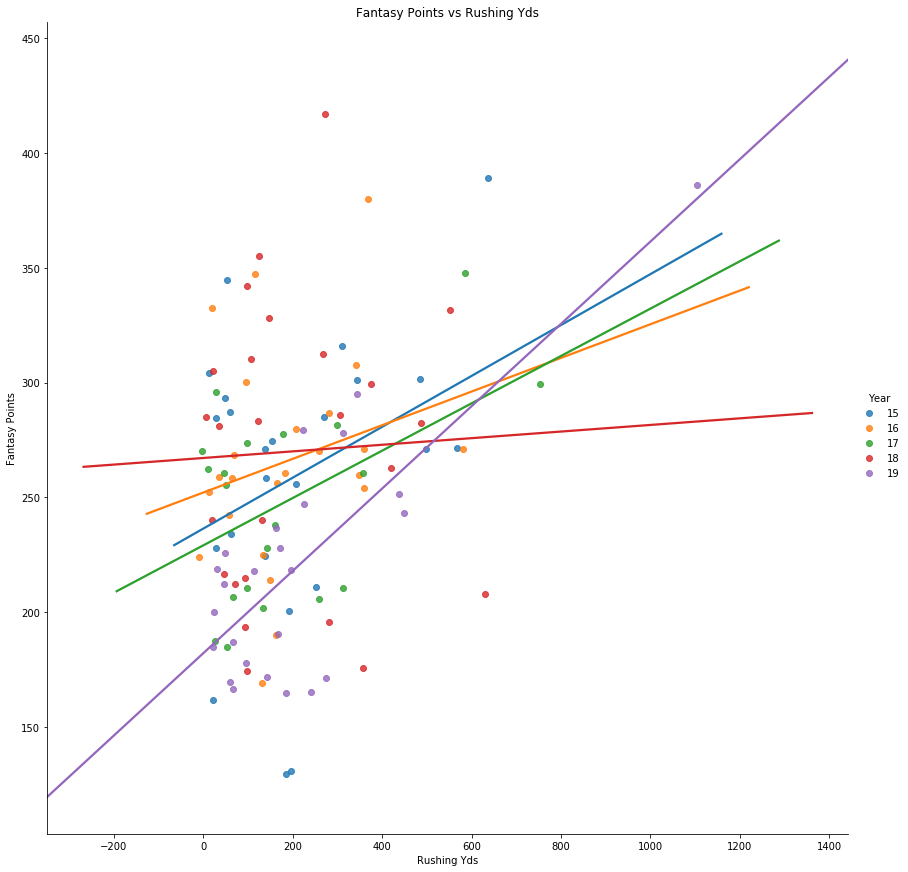

In [43]:
plot_Years('Rushing Yds', 'Fantasy Points')

We get even more randomness with rushing touchdowns vs fantasy points. Rushing touchdowns also happen less often then passing touchdowns, so we get less reliable regression with years having drastically different slopes. 

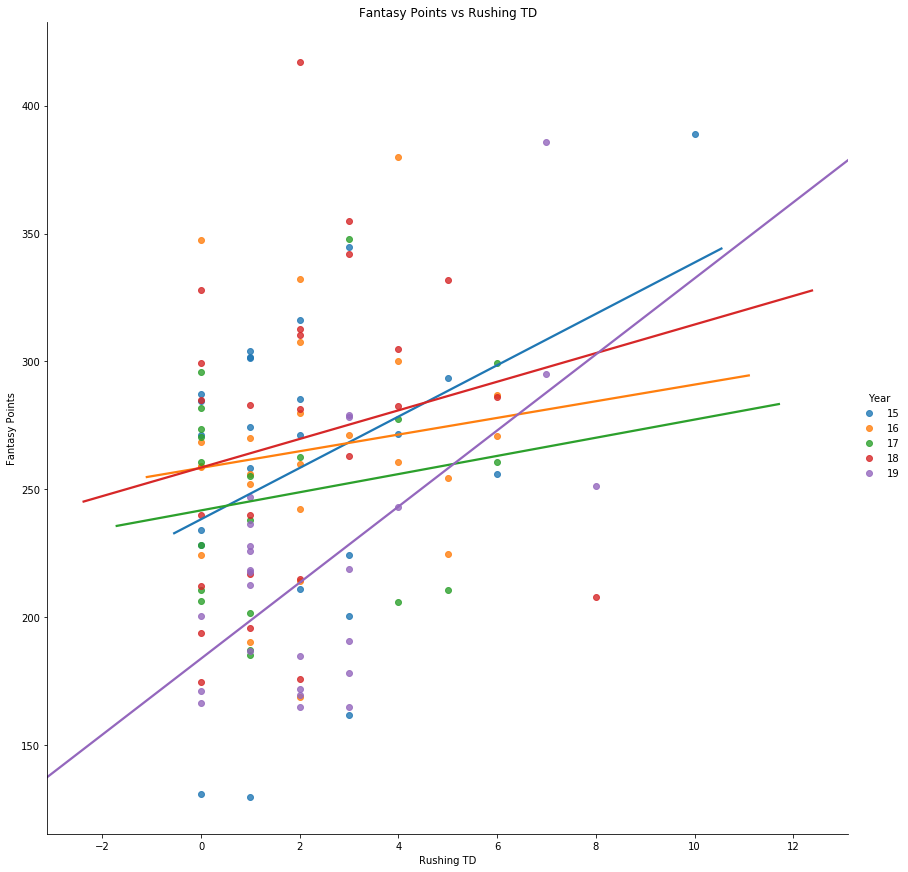

In [44]:
plot_Years('Rushing TD', 'Fantasy Points')

Overall, these plots tell us that the relationships between predictor values and Fantasy Points are different for different years. This means that it would be worth looking at the coefficients for individual years rather than only for the overall data set when analyzing our linear regression model.

<b><font size="5">2.4 Top Fantasy performers:</font></b>

In [0]:
data.sort_values(by=['Fantasy Points'], ascending=False, inplace = True)
data = data.reset_index(drop = True)

When we sort the data by Fantasy points, you can immediately see that our 3 hypothesized outliers are the first 3 values listed: Cam Newton's 2015 MVP season, Patrick Mahomes's 2018 season and Aaron Rodgers's 2016 season.

In [46]:
data.head()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
0,1,Patrick Mahomes 18,5097.0,50.0,12.0,272.0,2.0,2.0,417.08,18,18.0,13.0,5.0,0.0,0.722
1,1,Cam Newton 15,3837.0,35.0,10.0,636.0,10.0,4.0,389.08,15,14.0,6.0,8.0,0.0,0.429
2,1,Lamar Jackson 19,2889.0,33.0,6.0,1103.0,7.0,1.0,385.86,19,14.0,12.0,2.0,0.0,0.857
3,1,Aaron Rodgers 16,4428.0,40.0,7.0,369.0,4.0,4.0,380.02,16,16.0,6.0,9.0,1.0,0.406
4,2,Matt Ryan 18,4924.0,35.0,7.0,125.0,3.0,5.0,354.96,18,16.0,7.0,9.0,0.0,0.438


<b><font size="6">3. Linear Regression Model:</font></b>

<b><font size="5">3.1 Correlation:</font></b>

For this step of exploratory data analysis we looked at correlation between all of the attributes in our data set, win statistics and fantasy points. From the plots below, it is clear to see that the strongest correlation in our data occurs between Passing Touchdowns and Fantasy Points.

In [47]:
cor = data[['Passing Yds','Passing TD','Passing Int','Rushing TD','Fum Lost','Fantasy Points', 'GS', 'W', 'L','Pct']]
cor = cor.corr()
cor

,Passing Yds,Passing TD,Passing Int,Rushing TD,Fum Lost,Fantasy Points,GS,W,L,Pct
Passing Yds,1.000000,0.711874,0.251573,-0.163179,0.103877,0.713519,0.454116,0.350385,0.208283,0.130452
Passing TD,0.711874,1.000000,0.046604,-0.149693,0.061200,0.844500,0.515008,0.478341,0.123111,0.269305
Passing Int,0.251573,0.046604,1.000000,-0.103965,0.081294,-0.063332,-0.039571,-0.162578,0.189431,-0.284104
Rushing TD,-0.163179,-0.149693,-0.103965,1.000000,-0.085303,0.284030,-0.116735,0.005909,-0.206840,0.087594
Fum Lost,0.103877,0.061200,0.081294,-0.085303,1.000000,-0.033206,0.108509,-0.031977,0.224775,-0.085061
Fantasy Points,0.713519,0.844500,-0.063332,0.284030,-0.033206,1.000000,0.432720,0.437914,0.038152,0.277414
GS,0.454116,0.515008,-0.039571,-0.116735,0.108509,0.432720,1.000000,0.792915,0.465912,0.508108
W,0.350385,0.478341,-0.162578,0.005909,-0.031977,0.437914,0.792915,1.000000,-0.163973,0.871387
L,0.208283,0.123111,0.189431,-0.206840,0.224775,0.038152,0.465912,-0.163973,1.000000,-0.448782
Pct,0.130452,0.269305,-0.284104,0.087594,-0.085061,0.277414,0.508108,0.871387,-0.448782,1.000000


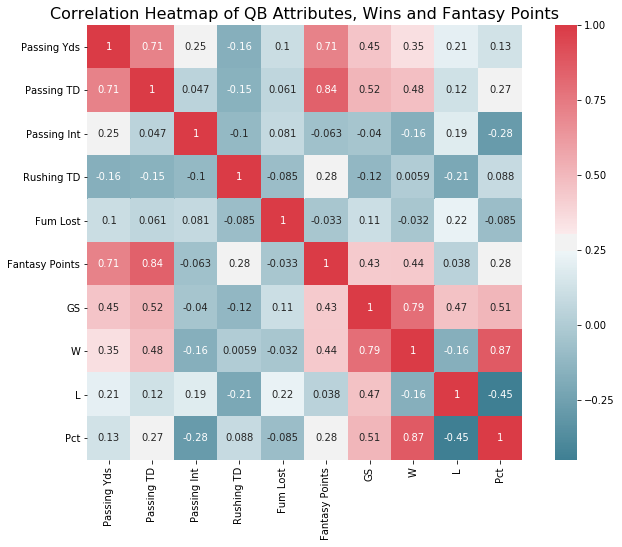

In [48]:
plt.figure(figsize=(12,8))
plt.title("Correlation Heatmap of QB Attributes, Wins and Fantasy Points", fontsize=16)
sns.heatmap(cor, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)
plt.show()


<b><font size="5">3.2 P-values:</font></b>

For the next step we will look at some of the p-values from our correlation matrix to determine how statistically significant our correlation coefficients are.

Passing Yards and Fantasy points have a 0.724 coefficient with a p-value < .0001. This implies that our coefficent is statistically significant. The high value of the coefficient (0.724) implies a moderate (<0.8) linear realtionship between fantasy points and passing yards.

In [49]:
scipy.stats.pearsonr(data['Fantasy Points'], data['Passing Yds'])

(0.7135193731710402, 1.2273744783029329e-19)

Passing Touchdowns and Fantasy points have a 0.845 coefficient with a p-value < .0001. This implies that our coefficent is statistically significant. The high value of the coefficient (0.845) implies a strong linear realtionship between fantasy points and passing touchdowns.

In [50]:
scipy.stats.pearsonr(data['Fantasy Points'], data['Passing TD'])

(0.8445000733788666, 3.0340419820264807e-33)

We looked to see how correlated game wins are to fantasy points. The p-value is <0.0001 which means that our coeffiecient is statistically significant. The value of 0.442 shows a weak correlation between Fantasy points and game wins. This is in keeping with our earlier thinking outlined in the Introduction that the winningest QBs do not necessarily earn the most fantasy points.

In [51]:
scipy.stats.pearsonr(data['Fantasy Points'], data['W'])

(0.43791433450804207, 7.081163149933913e-07)

In [0]:
 num_data  = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']]
 num_data = (num_data - num_data.mean())/num_data.std()
 data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']] = num_data


<b><font size="5">3.3 Linear Regression coefficients:</font></b>


In [53]:
data.head()

,Rank,Player,Passing Yds,Passing TD,Passing Int,Rushing Yds,Rushing TD,Fum Lost,Fantasy Points,Year,GS,W,L,T,Pct
0,1,Patrick Mahomes 18,1.963600,3.550359,0.353731,0.391667,-0.068433,-0.517517,417.08,18,18.0,13.0,5.0,0.0,0.722
1,1,Cam Newton 15,0.214340,1.493359,-0.152212,2.367345,3.731599,0.544518,389.08,15,14.0,6.0,8.0,0.0,0.429
2,1,Lamar Jackson 19,-1.101770,1.219092,-1.164098,4.902074,2.306587,-1.048534,385.86,19,14.0,12.0,2.0,0.0,0.857
3,1,Aaron Rodgers 16,1.034826,2.179025,-0.911126,0.918153,0.881575,0.544518,380.02,16,16.0,6.0,9.0,1.0,0.406
4,2,Matt Ryan 18,1.723423,1.493359,-0.911126,-0.406202,0.406571,1.075535,354.96,18,16.0,7.0,9.0,0.0,0.438


In [54]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']]
Y = data[['Fantasy Points']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          252.640847
Passing Yds     29.413853
Passing TD      29.001879
Passing Int     -7.858336
Rushing Yds     18.900190
Rushing TD      12.294117
Fum Lost        -3.316614
dtype: float64

In [55]:
results.pvalues

const          2.042156e-210
Passing Yds     5.913908e-82
Passing TD      1.036106e-83
Passing Int     1.313796e-44
Rushing Yds     1.718909e-68
Rushing TD      4.653128e-53
Fum Lost        6.415584e-18
dtype: float64

In [56]:
results.resid

0     -1.782882
1     -3.185768
2     -3.362536
3      0.199675
4      7.402488
         ...   
113   -0.058768
114    0.152112
115    0.123523
116    0.217523
117   -1.773154
Length: 118, dtype: float64

<b><font size="5">3.4 Residuals plot:</font></b>

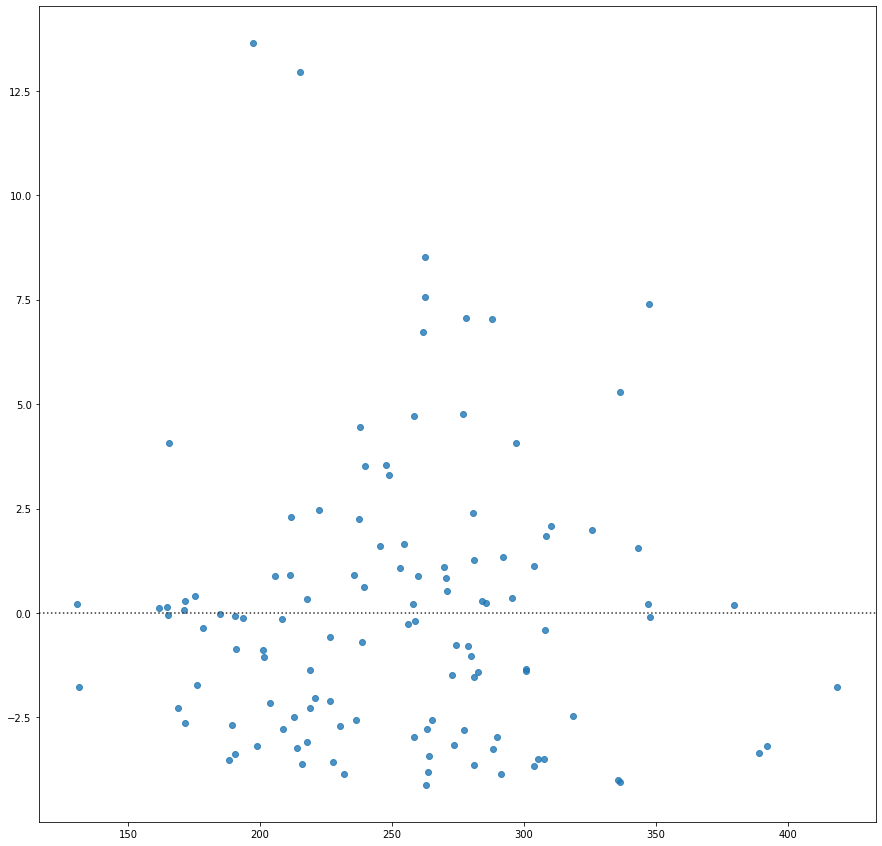

In [57]:
plt.figure(figsize =(15,15))
g = sns.residplot(x =results.predict(),y = results.resid,data = data)

In [0]:
regressions = pd.DataFrame()
regressions['Overall'] = results.params

In [59]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']][data['Year'] == 19]
Y = data[['Fantasy Points']][data['Year'] == 19]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
regressions['Year19'] = results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']][data['Year'] == 18]
Y = data[['Fantasy Points']][data['Year'] == 18]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
regressions['Year18'] = results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']][data['Year'] == 17]
Y = data[['Fantasy Points']][data['Year'] == 17]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
regressions['Year17'] = results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']][data['Year'] == 16]
Y = data[['Fantasy Points']][data['Year'] == 16]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
regressions['Year16'] = results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']][data['Year'] == 15]
Y = data[['Fantasy Points']][data['Year'] == 15]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
regressions['Year15'] = results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
regressions

,Overall,Year19,Year18,Year17,Year16,Year15
const,252.640847,252.288292,253.084303,251.179161,253.038696,253.230902
Passing Yds,29.413853,28.607572,29.835336,27.893745,30.781698,29.563576
Passing TD,29.001879,29.568053,29.466275,30.481177,26.889613,27.537429
Passing Int,-7.858336,-7.447174,-8.041826,-7.937220,-8.413850,-7.854515
Rushing Yds,18.900190,17.913026,18.134596,19.531749,21.107896,18.722619
Rushing TD,12.294117,14.077660,13.026287,11.117615,9.839589,12.009682
Fum Lost,-3.316614,-3.040658,-3.479363,-3.814073,-2.828460,-2.564899


<b><font size="5">3.5 Linear Regression Model for Real Games:</font></b>

In [65]:
X = data[['Passing Yds','Passing TD','Passing Int','Rushing Yds','Rushing TD','Fum Lost']]
Y = data[['W']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          6.745763
Passing Yds    0.009607
Passing TD     1.895406
Passing Int   -0.720629
Rushing Yds   -0.817112
Rushing TD     0.723251
Fum Lost      -0.186925
dtype: float64

<b><font size="5">4. Conclusion:</font></b>

In the correlation coefficient analysis we saw that Passing Touchdowns(0.845) had a greater correlation coefficient to Fantasy points, than did Passing Yards(0.724). The next closest statistic is the Rushing Touchdowns with a low correlation coefficient of 0.28 (weak correlation). This suggests that Passing Touchdowns has a greater linear relationship with Fantasy Points. It does not however, imply that passing touchdowns is a more important metric for fantasy points. Correlation does not imply causation.

Further, we looked at coefficients for linear regression model and found that overall Passing Yards had a slightly greater coefficient than did Passing Touchdowns (29.4 vs 29.0 respectively). Rushing Yards came third with a coefficient of 18.9, which is significantly less than both Passing Yards and Passing Touchdowns. Behind Rushing Yards we have Rushing Touchdowns with coefficient of 12.3, Passing Interceptions with -7.86, Fumbles Lost with -3.31. This suggests that Fantasy Points have the most dependence on both Passing Yards and Passing Touchdowns, with Passing Yards having a slight edge. In fact, when we track the linear regression model coefficients by season between Passing Touchdowns and Passing Yards, we see that the coefficient are always close, but are always switching as to which is greater depending on a season.

Based on our statistical analyses we can conclude that Passing Yards and Passing Touchdowns are the two most important metrics for accumulating the most Fantasy Points.

Moreover, we explored how each of our QBs statistics correlate to game wins. In the correlation coefficient analysis all of the coefficients for our QB attributes had a coefficient of 0.48 or lower, which suggests a weak linear relationship. When looking at our regression model coefficient we observe that Passing Touchdowns has the largest coefficient of 1.895, Rushing Touchdowns with coef of 0.723, and Passing Yards with coef of 0.009. From looking at both Fantasy and Game Wins analyses we can see that Passing Yards has little effect on game outcome, but matters a lot when it comes to Fantasy performance. This supports our earlier hypothesis of a good real-world performance not necessarily pointing to a good Fantasy start.